In [65]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

file_attached = "attached_apex.csv"
townhomes_data = pd.read_csv(file_attached)

In [66]:
townhomes_data.count()

MLS #                    1538
Status                   1538
Address                  1538
City                     1538
Zip                      1538
Closing Date             1538
Subdivision              1538
LvngAreaSF               1538
YrBlt                    1538
Beds                     1538
FBths                    1538
HBths                    1538
Property Type            1538
List Price               1538
Sold Price               1538
Days On Market           1538
HOA Y/N                  1326
Garage                   1538
Acres                    1538
Sold Price/List Price    1538
dtype: int64

In [67]:
townhomes_data.head()

,MLS #,Status,Address,City,Zip,Closing Date,Subdivision,LvngAreaSF,YrBlt,Beds,FBths,HBths,Property Type,List Price,Sold Price,Days On Market,HOA Y/N,Garage,Acres,Sold Price/List Price
0,2192440,CLOSED,202 Harbor Haven Drive,Apex,27502,6/28/2018,West Haven Townhomes,"1,058",2007,2,2,1,Attached,"$169,000.00","$163,000.00",2,Yes,0,0-.25 Acres,0.96
1,2173092,CLOSED,119 Halsmer Court,Apex,27502,3/15/2018,Heatherwood Townhomes,"1,275",1988,2,2,1,Attached,"$164,900.00","$164,900.00",0,Yes,0,0-.25 Acres,1.00
2,2264913,CLOSED,323 Port Haven Drive,Apex,27502,9/3/2019,West Haven Townhomes,"1,062",2007,2,1,1,Attached,"$170,900.00","$165,000.00",21,Yes,0,0-.25 Acres,0.97
3,2169851,CLOSED,315 Port Haven Drive,Apex,27502,4/6/2018,West Haven Townhomes,"1,056",2007,2,2,1,Attached,"$172,900.00","$166,000.00",36,Yes,0,0-.25 Acres,0.96
4,2280642,CLOSED,306 Port Haven Drive,Apex,27502,10/31/2019,West Haven Townhomes,"1,056",2007,2,1,1,Attached,"$169,900.00","$169,900.00",2,Yes,0,0-.25 Acres,1.00


In [68]:
townhomes_data.dtypes

MLS #                      int64
Status                    object
Address                   object
City                      object
Zip                       object
Closing Date              object
Subdivision               object
LvngAreaSF                object
YrBlt                      int64
Beds                       int64
FBths                      int64
HBths                      int64
Property Type             object
List Price                object
Sold Price                object
Days On Market             int64
HOA Y/N                   object
Garage                     int64
Acres                     object
Sold Price/List Price    float64
dtype: object

In [69]:
townhomes_df = townhomes_data.copy()
townhomes_df = townhomes_df.rename(columns={"Sold Price": "SoldPrice"})
townhomes_df = townhomes_df.rename(columns={"List Price": "ListPrice"})

#remove $
townhomes_df['SoldPrice'] = townhomes_df.SoldPrice.str.lstrip('$')
townhomes_df['ListPrice'] = townhomes_df.ListPrice.str.lstrip('$')
#remove comma
townhomes_df['SoldPrice'] = townhomes_df['SoldPrice'].str.replace(',', '').astype(float)
townhomes_df['ListPrice'] = townhomes_df['ListPrice'].str.replace(',', '').astype(float)
townhomes_df['LvngAreaSF'] = townhomes_df['LvngAreaSF'].str.replace(',', '').astype(int)
townhomes_df.head()

,MLS #,Status,Address,City,Zip,Closing Date,Subdivision,LvngAreaSF,YrBlt,Beds,FBths,HBths,Property Type,ListPrice,SoldPrice,Days On Market,HOA Y/N,Garage,Acres,Sold Price/List Price
0,2192440,CLOSED,202 Harbor Haven Drive,Apex,27502,6/28/2018,West Haven Townhomes,1058,2007,2,2,1,Attached,169000.0,163000.0,2,Yes,0,0-.25 Acres,0.96
1,2173092,CLOSED,119 Halsmer Court,Apex,27502,3/15/2018,Heatherwood Townhomes,1275,1988,2,2,1,Attached,164900.0,164900.0,0,Yes,0,0-.25 Acres,1.00
2,2264913,CLOSED,323 Port Haven Drive,Apex,27502,9/3/2019,West Haven Townhomes,1062,2007,2,1,1,Attached,170900.0,165000.0,21,Yes,0,0-.25 Acres,0.97
3,2169851,CLOSED,315 Port Haven Drive,Apex,27502,4/6/2018,West Haven Townhomes,1056,2007,2,2,1,Attached,172900.0,166000.0,36,Yes,0,0-.25 Acres,0.96
4,2280642,CLOSED,306 Port Haven Drive,Apex,27502,10/31/2019,West Haven Townhomes,1056,2007,2,1,1,Attached,169900.0,169900.0,2,Yes,0,0-.25 Acres,1.00


In [70]:
townhomes_df["Subdivision"].nunique()

57

In [71]:
#scramble dataframe
random_townhomes_df = townhomes_df.sample(frac=1)
random_townhomes_df

,MLS #,Status,Address,City,Zip,Closing Date,Subdivision,LvngAreaSF,YrBlt,Beds,FBths,HBths,Property Type,ListPrice,SoldPrice,Days On Market,HOA Y/N,Garage,Acres,Sold Price/List Price
525,2341403,CLOSED,243 Grenoch Valley Lane,Apex,27539,10/9/2020,Scots Laurel,2535,2005,4,3,1,Attached,275000.0,280500.0,2,Yes,2,0-.25 Acres,1.02
944,2316024,CLOSED,2263 Red Knot Lane,Apex,27502,9/23/2020,Peak 502 at Beaver Creek,2109,2020,4,3,1,Attached,309900.0,309900.0,0,Yes,2,0-.25 Acres,1.00
1382,2198539,CLOSED,2547 Sunnybranch Lane,Apex,27523,11/7/2018,The Preserve at White Oak Creek,2238,2018,3,2,1,Attached,352671.0,352214.0,0,Yes,2,0-.25 Acres,1.00
924,2322838,CLOSED,1115 Little Gem Lane,Apex,27523,8/11/2020,Sweetwater,1841,2017,3,2,1,Attached,315000.0,308500.0,36,Yes,1,0-.25 Acres,0.98
1171,2227764,CLOSED,3419 Antler View Drive,Apex,27502,3/29/2019,Deer Creek,2196,2019,3,2,1,Attached,349900.0,325000.0,0,Yes,2,0-.25 Acres,0.93
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,2296352,CLOSED,832 Myrtle Grove Lane,Apex,27502,2/28/2020,The Groves,1499,2009,2,2,1,Attached,220000.0,220000.0,19,Yes,0,0-.25 Acres,1.00
945,2199716,CLOSED,317 Great Northern Station,Apex,27502,3/29/2019,The Villages of Apex,2203,2019,3,3,1,Attached,309900.0,309900.0,0,Yes,2,0-.25 Acres,1.00
1160,2247115,CLOSED,2933 Sunflower Road,Apex,27502,7/15/2019,Smith Farm,2406,2019,4,3,1,Attached,325000.0,325000.0,0,Yes,2,0-.25 Acres,1.00
830,2283264,CLOSED,2875 Dallas Valley Lane,Apex,27502,8/14/2020,Townes at Friendship Station,1787,2019,3,2,1,Attached,302000.0,302000.0,0,Yes,2,0-.25 Acres,1.00


In [72]:
#set up model
# = townhomes_df.drop["SoldPrice"]
X = random_townhomes_df[["YrBlt", "Beds", "FBths", "LvngAreaSF","HBths", "Days On Market", "Garage", "Sold Price/List Price"]]
y = random_townhomes_df["SoldPrice"]
print(X.shape, y.shape)

(1538, 8) (1538,)


In [74]:
#normalize data
X = (X-X.min())/(X.max()-X.min())

y_min = y.min()
y_max = y.max()
y = (y-y.min())/(y.max()-y.min())


In [75]:
#unnormalizse data
#unnormalize for final reports
y_inverse = y*(y_max-y_min)+y_min
y_inverse

525     280500.0
944     309900.0
1382    352214.0
924     308500.0
1171    325000.0
          ...   
150     220000.0
945     309900.0
1160    325000.0
830     302000.0
1516    411714.0
Name: SoldPrice, Length: 1538, dtype: float64

In [14]:
#X = X.astype(float)
# prepare input data
#def prepare_inputs(X_train, X_test):
    #ohe = OneHotEncoder()
    #ohe.fit(X_train)
    #X_train_enc = ohe.transform(X_train)
    #X_test_enc = ohe.transform(X_test)
    #return X_train_enc, X_test_enc

In [76]:
# prepare target
'''def prepare_targets(y_train, y_test):
    le = LabelEncoder()
    le.fit(y_train)
    y_train_enc = le.transform(y_train)
    y_test_enc = le.transform(y_test)
    return y_train_enc, y_test_enc'''

'def prepare_targets(y_train, y_test):\n    le = LabelEncoder()\n    le.fit(y_train)\n    y_train_enc = le.transform(y_train)\n    y_test_enc = le.transform(y_test)\n    return y_train_enc, y_test_enc'

In [77]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from tensorflow.keras.utils import to_categorical

X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=1)

In [78]:
random_townhomes_df.dtypes

MLS #                      int64
Status                    object
Address                   object
City                      object
Zip                       object
Closing Date              object
Subdivision               object
LvngAreaSF                 int32
YrBlt                      int64
Beds                       int64
FBths                      int64
HBths                      int64
Property Type             object
ListPrice                float64
SoldPrice                float64
Days On Market             int64
HOA Y/N                   object
Garage                     int64
Acres                     object
Sold Price/List Price    float64
dtype: object

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow as tf

# Create model and add layers
model = Sequential()
model.add(Dense(units=100, activation='relu', input_dim=8))
model.add(Dense(units=100, activation='relu'))
model.add(Dense(units=1, activation= None))

In [19]:
# Compile and fit the model
model.compile(optimizer='adam',
              loss= tf.keras.losses.MeanAbsoluteError()
             )
#model.summary()
X_train.dtypes

YrBlt                    float64
Beds                     float64
FBths                    float64
LvngAreaSF               float64
HBths                    float64
Days On Market           float64
Garage                   float64
Sold Price/List Price    float64
dtype: object

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               900       
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 101       
Total params: 11,101
Trainable params: 11,101
Non-trainable params: 0
_________________________________________________________________


In [21]:
model.fit(
    X_train,
    y_train,
    epochs=100,
    shuffle=True,
    verbose=2, 
    batch_size = 1
)

Epoch 1/100
1153/1153 - 3s - loss: 0.0829
Epoch 2/100
1153/1153 - 3s - loss: 0.0713
Epoch 3/100
1153/1153 - 2s - loss: 0.0655
Epoch 4/100
1153/1153 - 2s - loss: 0.0665
Epoch 5/100
1153/1153 - 2s - loss: 0.0655
Epoch 6/100
1153/1153 - 2s - loss: 0.0636
Epoch 7/100
1153/1153 - 2s - loss: 0.0637
Epoch 8/100
1153/1153 - 2s - loss: 0.0630
Epoch 9/100
1153/1153 - 2s - loss: 0.0648
Epoch 10/100
1153/1153 - 2s - loss: 0.0639
Epoch 11/100
1153/1153 - 2s - loss: 0.0628
Epoch 12/100
1153/1153 - 2s - loss: 0.0634
Epoch 13/100
1153/1153 - 2s - loss: 0.0614
Epoch 14/100
1153/1153 - 2s - loss: 0.0611
Epoch 15/100
1153/1153 - 2s - loss: 0.0616
Epoch 16/100
1153/1153 - 2s - loss: 0.0606
Epoch 17/100
1153/1153 - 2s - loss: 0.0601
Epoch 18/100
1153/1153 - 2s - loss: 0.0610
Epoch 19/100
1153/1153 - 2s - loss: 0.0599
Epoch 20/100
1153/1153 - 2s - loss: 0.0602
Epoch 21/100
1153/1153 - 2s - loss: 0.0599
Epoch 22/100
1153/1153 - 2s - loss: 0.0590
Epoch 23/100
1153/1153 - 2s - loss: 0.0594
Epoch 24/100
1153/11

In [22]:
model_loss = model.evaluate(X_test, y_test, verbose=2)
print(f"Loss: {model_loss}")

13/13 - 0s - loss: 0.0591
Loss: 0.05905820056796074


In [23]:
predictions, predictions2 = model.predict(X_test), model.predict(X_test)
flat_list = []
for sublist in predictions:
    for item in sublist:
        flat_list.append(item)
flat_list

[0.5756588,
 0.5704649,
 0.54113877,
 0.4793843,
 0.11673546,
 0.48956037,
 0.38249618,
 0.23767728,
 0.47887304,
 0.43799123,
 0.57665694,
 0.36752826,
 0.5515628,
 0.09168777,
 0.8027305,
 0.09296964,
 0.64736664,
 0.5514519,
 0.2631401,
 0.35250235,
 0.31013194,
 0.52103186,
 0.35389262,
 0.46803853,
 0.111941725,
 0.39217597,
 0.24735801,
 0.4596078,
 0.347043,
 0.31268755,
 0.41367567,
 0.65101826,
 0.6119983,
 0.5802063,
 0.3897018,
 0.40910783,
 0.39893836,
 0.528873,
 0.49279878,
 0.36606392,
 0.43542433,
 0.3731859,
 0.55068815,
 0.36706126,
 0.5206455,
 0.6159153,
 0.528873,
 0.6709728,
 0.8159057,
 0.5717193,
 0.15068525,
 0.52735597,
 0.12097195,
 0.40303677,
 0.65101826,
 0.6067429,
 0.62465954,
 0.86974305,
 0.60667545,
 0.55211866,
 0.5374881,
 0.46059006,
 0.04779239,
 0.5340611,
 0.59647524,
 0.52931815,
 0.36966646,
 0.47657073,
 0.8867824,
 0.5337337,
 0.63584363,
 0.10343526,
 0.48068118,
 0.2206246,
 0.60667545,
 0.26128232,
 0.46654612,
 0.21036285,
 0.70738393,
 

In [56]:
model_loss

0.05905820056796074

In [79]:
#calculate gradient
#inp = tf.convert_to_tensor(X_test)
#preds = tf.convert_to_tensor()

#grads = tape.gradient(model_loss, inp)

In [24]:
actuals = y_test

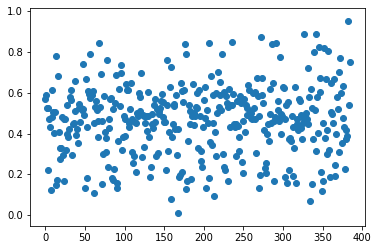

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

x_range = range(0,385)
#plt.scatter(actuals, predictions)
g=plt.scatter(x_range, actuals)


#g.axes.set_yscale('log')
#g.axes.set_xscale('log')
#g.axes.set_xlabel('True Values ')
#g.axes.set_ylabel('Predictions ')
#g.axes.axis('equal')
#g.axes.axis('square')

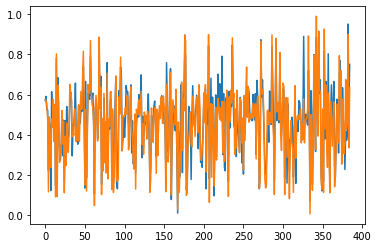

In [26]:
fig, ax = plt.subplots()
ax.plot(x_range,actuals)
ax.plot(x_range,predictions)


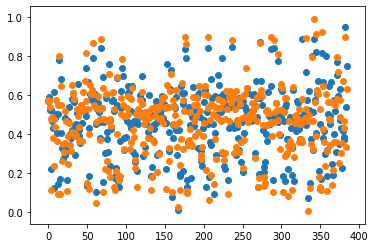

In [45]:
fig, ax = plt.subplots()
ax.scatter(x_range,actuals)
ax.scatter(x_range,predictions)

In [80]:
#r2 and mse

from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(actuals, predictions)
r2 = r2_score(actuals, predictions)
print(f’Mean squared error: {mse.round(3)} \nr2: {r2.round(3)}’)

SyntaxError: invalid character in identifier (<ipython-input-80-807062f8ba48>, line 6)